In [3]:
# in this project
# learn about brain
# many concepts and chanlenging
# computational neuroscience 

In [4]:
# simulate one brain cell

import numpy as np
import matplotlib.pyplot as plt

In [5]:
a = .02
b = .2
c =-50
d = 2

v = -65
u = b*v


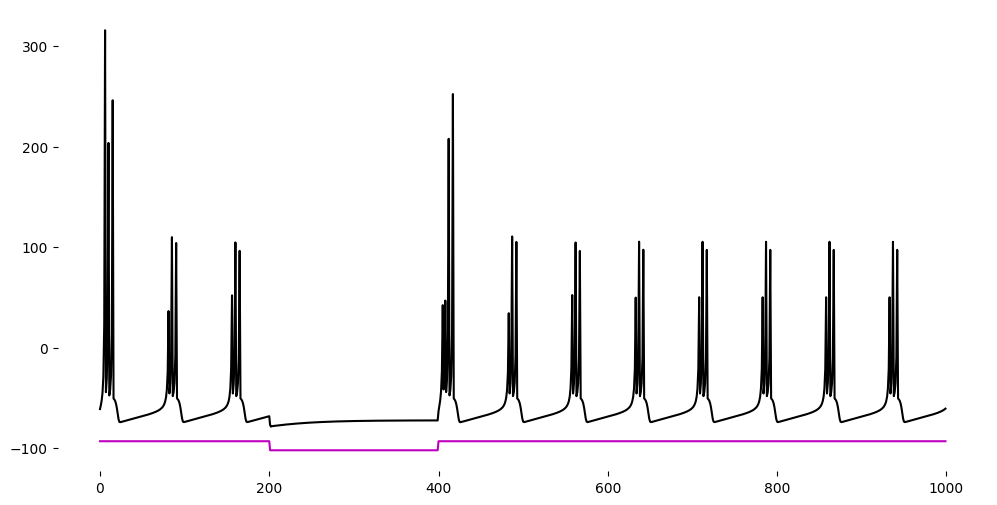

In [6]:
simulation_time = 1000
memvolt = np.zeros(simulation_time)
Iall = np.zeros(simulation_time)

for t in range(simulation_time):
    #define the input strength
    I = -2 if (t > 200) & (t< 400) else 7
        
    
    #check of there is an action potential
    if v>= 30:
        v = c
        u = u + d
        
        
    # update the menbrane variable
    v += 0.04*v**2 + 5*v + 140 - u + I
    u += a*(b*v -u)
    
    #collect the variables for subsequen plotting
    memvolt[t] = v
    Iall[t] = I
    

# plotting
fig, ax = plt.subplots(1, figsize = (12,6))

plt.plot(memvolt , 'k', label = "Membrane potential")
plt.plot(Iall -100, 'm', label = 'Stimulation')
plt.box(False)
plt.show()


In [27]:
# build circuit of 1000 neurons
# Excitatory cells                              Inhibit cells
import numpy as np
Ne = 800;                                       Ni = 200
re = np.random.rand(Ne)**2;                    ri = np.random.rand(Ni)
re2 = np.random.rand(Ni)**2;                    ri = np.random.rand(Ni)

a = np.hstack((.02*np.ones(Ne),                 0.2+0.8*ri))
b = np.hstack((.2*np.ones(Ne),                  .25-0.5*ri))
c = np.hstack((-65 + 15*re,                     -65*np.ones(Ni)))
d = np.hstack((8 - 6*re,                        2*np.ones(Ni)))

v = -65*np.ones(Ne+Ni)
u = b*v

In [28]:
# S matrix 
S = np.hstack((0.5*np.random.rand(Ne+Ni, Ne), -np.random.rand(Ne+Ni, Ni)))

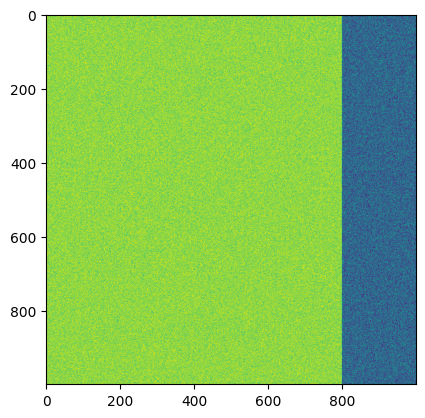

In [29]:
plt.imshow(S);

In [47]:
# 
simulation_time = 5000
firings = np.array([[],[]])

for t in range(simulation_time):
    # define the exogenous input
    I = np.hstack((5*np.random.randn(Ne), 2*np.random.randn(Ni)))
    # check for actin potentials
    fired = np.where(v>=30)[0]
    # store the spike indices and times
    tmp = np.stack((np.tile(t, len(fired)), fired))
    firings  = np.concatenate((firings, tmp), axis = 1)
    # update membrane variables for neurons that spikded
    v[fired] = c[fired]
    u[fired] = u[fired] + d[fired]
    # update the i to incudle spiking activity
    I += np.sum(S[:, fired], axis = 1)
    # update membrane potential for ALL neurons 
    v+= 0.04*v**2 + 5*v + 140 -u +I
    u+= a*(b*v-u)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21288\357909401.py:19: RuntimeWarning: overflow encountered in square
  v+= 0.04*v**2 + 5*v + 140 -u +I
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21288\357909401.py:20: RuntimeWarning: invalid value encountered in add
  u+= a*(b*v-u)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21288\357909401.py:19: RuntimeWarning: invalid value encountered in add
  v+= 0.04*v**2 + 5*v + 140 -u +I


In [49]:
t

4999

In [43]:
plt.plot(firings[0, :], firings[1, :], 'k.')

array([[999, 999, 999, 999, 999, 999],
       [179, 448, 837, 179, 448, 837]], dtype=int64)